In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

In [83]:
df = pd.read_csv("../data/reduced_heart.csv")

In [84]:
X = df.drop(columns=["num"])
y = df["num"]

In [85]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


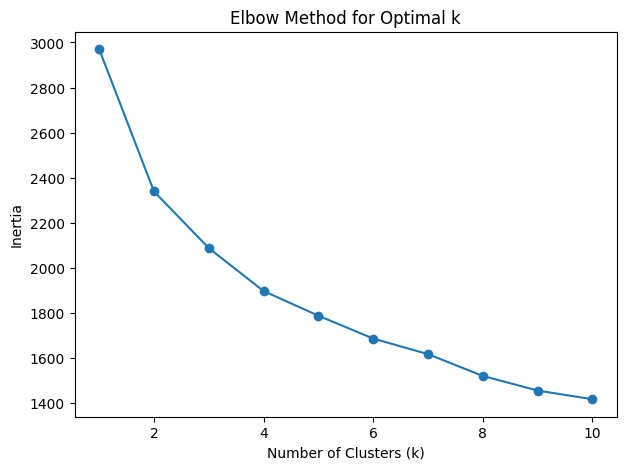

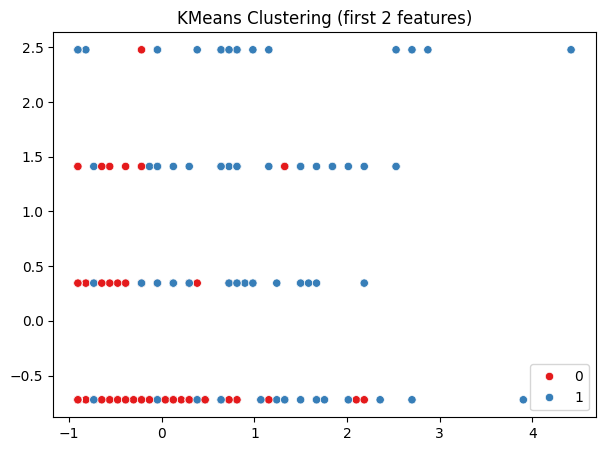


🔍 KMeans vs True Labels:
 KMeans_cluster    0   1
num                    
0               147  13
1                31  23
2                 4  31
3                 2  33
4                 0  13


In [86]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(7,5))
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters_kmeans = kmeans.fit_predict(X_scaled)

df["KMeans_cluster"] = clusters_kmeans

plt.figure(figsize=(7,5))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=clusters_kmeans, palette="Set1")
plt.title("KMeans Clustering (first 2 features)")
plt.show()

ct_kmeans = pd.crosstab(df["num"], df["KMeans_cluster"])
print("\n🔍 KMeans vs True Labels:\n", ct_kmeans)


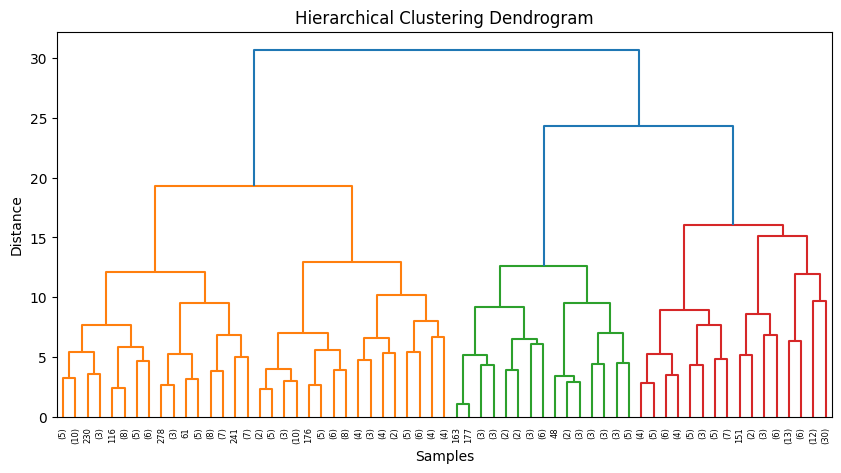


🔍 Hierarchical Clustering vs True Labels:
 Hierarchical_cluster   0    1
num                          
0                     45  115
1                     30   24
2                     32    3
3                     34    1
4                     12    1


In [88]:
linked = linkage(X_scaled, method="ward")

plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

hc = AgglomerativeClustering(n_clusters=2, metric="euclidean", linkage="ward")
clusters_hc = hc.fit_predict(X_scaled)

df["Hierarchical_cluster"] = clusters_hc

ct_hc = pd.crosstab(df["num"], df["Hierarchical_cluster"])
print("\n🔍 Hierarchical Clustering vs True Labels:\n", ct_hc)